Імпортуємо модулі

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report

Зчитуємо файл та виводимо значення

In [2]:
data = pd.read_csv("/Users/yurab/Desktop/Python for university/MMTAD/Lab2/digital_marketing_campaign_dataset.csv", sep=',')
data_clean = data.dropna()
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


Обираємо кластери за допомогою ієрархучного методу(фактично лаб 3)

In [3]:
l = data_clean[["Age", "Income"]]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(l)
z = linkage(x_scaled, method = 'ward')

Виводимо таблицю для зручності оцінки

In [4]:
clustering = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels = clustering.fit_predict(l)
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_table = pd.DataFrame({"Cluster": unique_labels, "Cluster size": counts})
print(cluster_table)

   Cluster  Cluster size
0        0          2399
1        1          1975
2        2          1885
3        3          1741


Обираємо найбільші кластери та виводимо

In [5]:
data_cluster_0 = l[labels == 0]
data_cluster_1 = l[labels == 1]
print(data_cluster_0, data_cluster_1)


      Age  Income
0      56  136912
8      36  140788
9      40  130764
12     41  131093
14     57  148788
...   ...     ...
7986   43  130747
7992   37  138422
7993   20  120271
7994   69  124883
7997   28  125471

[2399 rows x 2 columns]       Age  Income
7      56   57083
13     53   64608
17     39   71330
19     41   69949
22     55   57586
...   ...     ...
7974   46   67201
7975   56   74254
7980   33   70978
7981   24   60883
7991   62   69289

[1975 rows x 2 columns]


Тренуємо модель

In [6]:
X_svm = pd.concat([data_cluster_0, data_cluster_1])
Y_svm = np.array([0]*len(data_cluster_0) + [1]*len(data_cluster_1))
Y_svm
x_train, x_test, y_train, y_test = train_test_split(X_svm, Y_svm, test_size=2)

Кернел - лінійний

In [7]:
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Точність

In [8]:
y_pred = clf.predict(x_test)
accuracy_score(y_pred, y_test)

0.5

Робимо мін/макс

In [9]:
age_min, age_max = data_clean["Age"].min(), data_clean["Age"].max()
income_min, income_max = data_clean["Income"].min(), data_clean["Income"].max()

За допомогою meshgrid робимо діапазон для сітки

In [10]:
xx, yy = np.meshgrid(np.arange(age_min,age_max, 1), np.arange(income_min, income_max, 10000))
xy =  clf.predict(np.c_[xx.ravel(), yy.ravel()])
xy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
xy = xy.reshape(xx.shape)
xy

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Малюємо графік (гіперплощину)

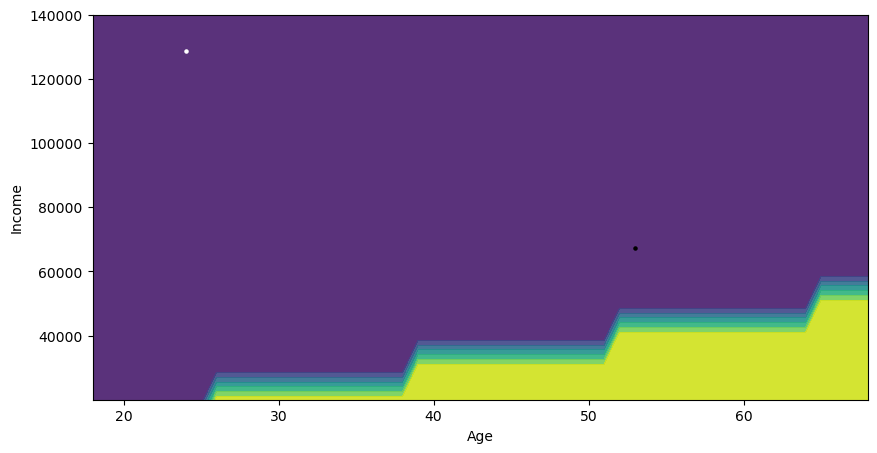

In [12]:
plt.figure(figsize = (10,5))
plt.contourf(xx,yy,xy,cmap = plt.cm.viridis, alpha = 0.9)
plt.scatter(x_test[y_test == 0]["Age"], x_test[y_test == 0]["Income"], s=5, c='white')
plt.scatter(x_test[y_test == 1]["Age"], x_test[y_test == 1]["Income"], s=5, c='black')
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

Інтерсепт, що розділяє гіперплощину, що використовує моделлю для класифікації даних.                                                                                                                                                 Коеф - масив коеф., що відповідають та показують наклон гіперплощинни.

In [13]:
print(clf.intercept_, clf.coef_)

[0.00018708] [[ 7.45375586e-03 -9.65928896e-06]]
